# Date - May 27, 2024

**Classification**

---> Binary Classification - (Classification between 2 classes)

Sigmoid Function(It is used for binary classification)

S(x) = 1/(1 + e^(-x))

---> Logistic Regression (This Algorithm is used for binary classification.)

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('titanic_train.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
X_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df['Survived']

In [7]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Feature Engineering**

In [9]:
X_train = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                'Fare', 'Cabin', 'Embarked']]

In [10]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
gender = X_train['Sex']

**Exploratory Data Analysis**

In [13]:
import seaborn as sns 

<Axes: xlabel='Sex', ylabel='count'>

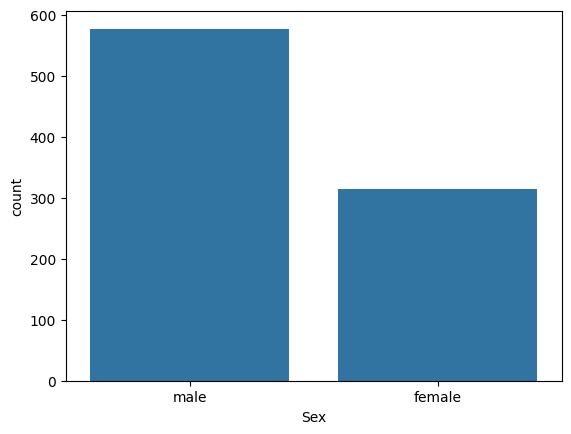

In [14]:
sns.countplot(x = gender)

<Axes: xlabel='Sex', ylabel='count'>

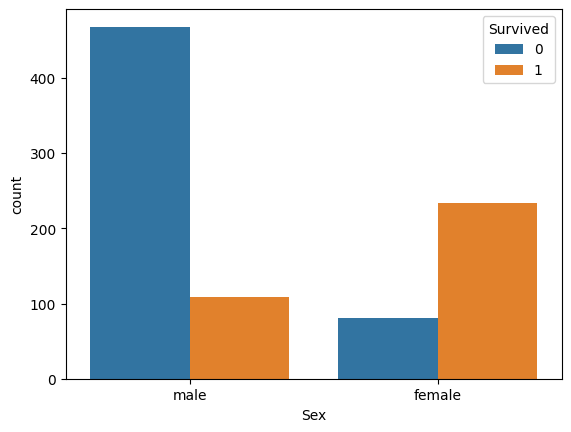

In [15]:
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived')

In [16]:
sex = pd.get_dummies(gender, drop_first = True)

In [17]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [18]:
X_train = pd.concat([X_train, sex], axis = 1)

In [19]:
X_train.drop(['Sex'], axis = 1, inplace = True)

<Axes: xlabel='Pclass', ylabel='count'>

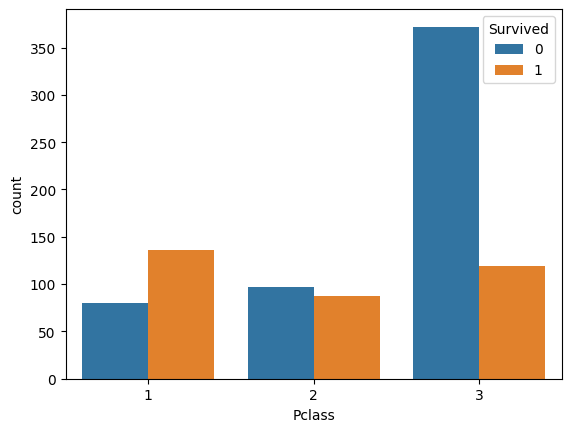

In [20]:
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived')

In [21]:
X_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [22]:
pclass = pd.get_dummies(X_train['Pclass'], prefix = 'Class_', drop_first = True)

In [23]:
pclass

,Class__2,Class__3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
886,True,False
887,False,False
888,False,True
889,False,False


In [24]:
X_train = pd.concat([X_train, pclass], axis = 1)

In [25]:
X_train.drop(['Pclass'], axis = 1, inplace = True)

In [26]:
X_train.head()

,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Class__2,Class__3
0,22.0,1,0,7.2500,NaN,S,True,False,True
1,38.0,1,0,71.2833,C85,C,False,False,False
2,26.0,0,0,7.9250,NaN,S,False,False,True
3,35.0,1,0,53.1000,C123,S,False,False,False
4,35.0,0,0,8.0500,NaN,S,True,False,True


In [27]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

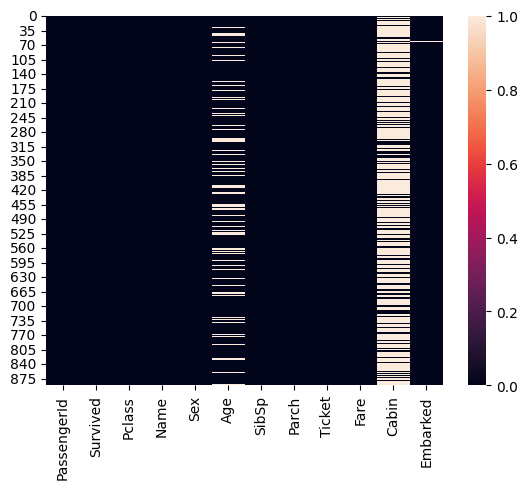

In [29]:
sns.heatmap(train_df.isnull())

Cabin is removed because of large number of missing values in Cabin variable.

In [30]:
X_train.drop(['Cabin'], axis = 1, inplace = True)

__Now, the Age also has missing values in it.__

__To fill age we are having 3 approaches for now.__

    1. Taking full dataset age average and fill it which is bad due to spread of data
    2. Taking average based on Pclass category as there is trend of more old people in high class while young in low classes.
    3. Use Linear Regression to predict the age values.

Here, We go with 2nd approach

In [35]:
age1 = int(train_df[train_df['Pclass'] == 1]['Age'].mean())

In [36]:
age2 = int(train_df[train_df['Pclass'] == 2]['Age'].mean())

In [37]:
age3 = int(train_df[train_df['Pclass'] == 3]['Age'].mean())

Now, filling based on Pclass using mean age of each class

In [43]:
import numpy as np

In [61]:
def ageMissing(d):
    Pclass = d[0]
    age = d[1]

    if np.isnan(age):
        if Pclass == 1:
            return age1
        elif Pclass == 2:
            return age2
        elif Pclass == 3:
            return age3
        else:
            return 0
    else:
        return age



In [62]:
train_df.iloc[:, [2,5]]

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [64]:
age = train_df[['Pclass', 'Age']].apply(ageMissing, axis = 1)

C:\Users\dell\AppData\Local\Temp\ipykernel_47296\1823279587.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = d[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_47296\1823279587.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = d[1]


In [67]:
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [66]:
type(age)

pandas.core.series.Series

In [68]:
train_df['Age'] = age

<Axes: >

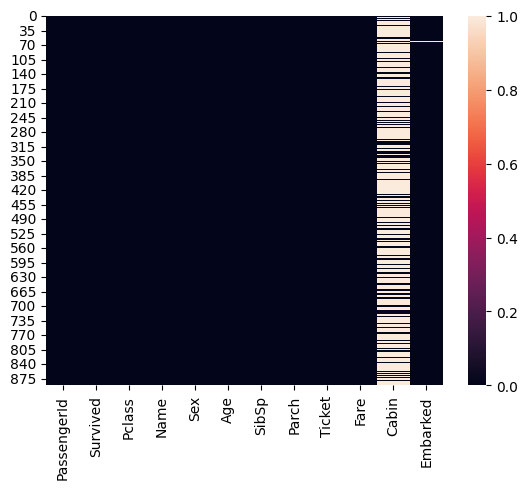

In [69]:
sns.heatmap(train_df.isnull())

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   male      891 non-null    bool   
 6   Class__2  891 non-null    bool   
 7   Class__3  891 non-null    bool   
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 37.5+ KB


In [71]:
X_train['Age'] = age

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   male      891 non-null    bool   
 6   Class__2  891 non-null    bool   
 7   Class__3  891 non-null    bool   
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 37.5+ KB


<Axes: xlabel='SibSp', ylabel='count'>

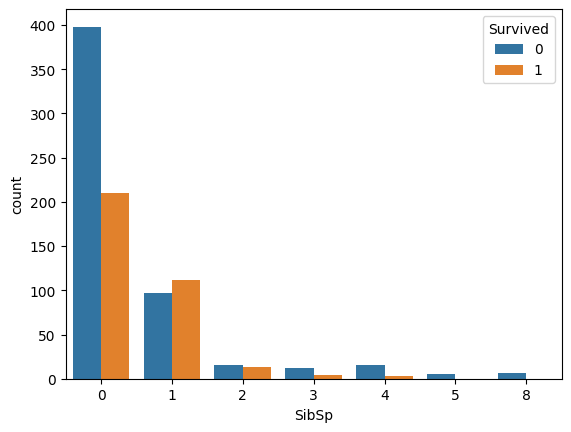

In [76]:
sns.countplot(x = X_train['SibSp'], hue = y_train)

In [78]:
# By logic, this SibSp is negligiable and can cause large number of features due to category nature of this feature

X_train.drop(['SibSp'], axis = 1, inplace = True)

<Axes: xlabel='Parch', ylabel='count'>

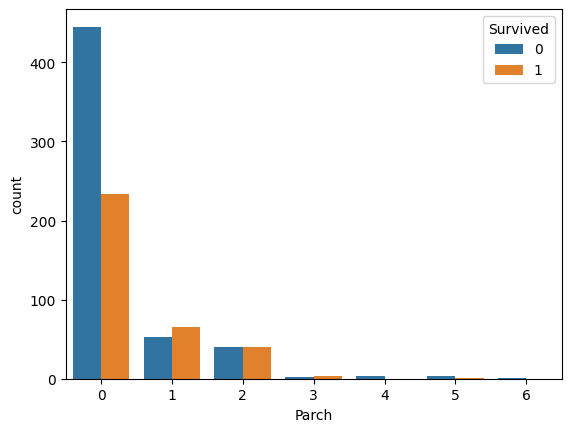

In [79]:
sns.countplot(data = train_df, x = 'Parch', hue = train_df['Survived'])

In [80]:
X_train.drop(['Parch'], axis = 1, inplace = True)

In [81]:
X_train['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

The fare feature will be eliminated because it is dependent on Pclass.

All features should be independent of each other

Embarked feature is also useless as it doesn't make much logic sense

In [82]:
X_train.head()

,Age,Fare,Embarked,male,Class__2,Class__3
0,22.0,7.2500,S,True,False,True
1,38.0,71.2833,C,False,False,False
2,26.0,7.9250,S,False,False,True
3,35.0,53.1000,S,False,False,False
4,35.0,8.0500,S,True,False,True


In [83]:
X_train.drop(['Fare', 'Embarked'], axis = 1, inplace = True)

In [84]:
X_train.head()

,Age,male,Class__2,Class__3
0,22.0,True,False,True
1,38.0,False,False,False
2,26.0,False,False,True
3,35.0,False,False,False
4,35.0,True,False,True


In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   male      891 non-null    bool   
 2   Class__2  891 non-null    bool   
 3   Class__3  891 non-null    bool   
dtypes: bool(3), float64(1)
memory usage: 9.7 KB


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression()

In [88]:
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
model.coef_

array([[-0.03370409, -2.4898238 , -1.02961305, -2.26183852]])

In [90]:
X_train.columns

Index(['Age', 'male', 'Class__2', 'Class__3'], dtype='object')

In [99]:
model.predict(X_train)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [101]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64